## 2. Solenoid tube

### Libraries:

In [27]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
## The next line causes matplot lib it plot in the notebook, rather than poping up a window, for animations turn this off 
%matplotlib inline    
from mpl_toolkits.mplot3d import Axes3D   ## this is a special library to plot in 3d we are using today
import matplotlib as mpl
import matplotlib.cm as cm

### Bloop function:

In [33]:
#####  B field function simplified
def Bloop(r_loop,x_pos,y_pos,z_pos,I,x,y,z):
    d_theta = 2*np.pi/100
    theta = np.arange(0, 2*np.pi, d_theta)
    x_loop = r_loop*np.cos(theta) + x_pos
    y_loop = r_loop*np.sin(theta) + y_pos
    
    dl_x = -r_loop * d_theta * np.sin(theta)
    dl_y = r_loop * d_theta * np.cos(theta)
    
    x_sep = x - x_loop
    y_sep = y - y_loop
    z_sep = z - z_pos
    
    mag_rsep = np.sqrt(x_sep**2 + y_sep**2 + z_sep**2)
    
    Bx = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_y*z_sep)*mag_rsep**-3)
    By = np.sum((1.2566e-6)/(4*np.pi)*I*(-dl_x*z_sep)*mag_rsep**-3)
    Bz = np.sum((1.2566e-6)/(4*np.pi)*I*(dl_x*y_sep-dl_y*x_sep)*mag_rsep**-3)
    
    return(Bx,By,Bz)

### Function for creating a plane of B-field data in the xz plane

In [164]:
def B_xz_plane(x_min, x_max, z_min, z_max, x_step, z_step, y_value, R_loop, 
               x_pos,y_pos,z_pos,I):
    '''
    parameters:
    x_min: minimum x value of plane
    x_max: maximum x value of plane
    z_min: minimum z value of plane
    z_max: maximum z value of plane
    y_value: y value of xz plane
    
    
    x_pos: x position of ring 
    y_pos: y position of ring
    z_pos: z position of ring
    '''
    x_step = 0.1
    z_step = 0.1
    
    x_range = np.arange(x_min, x_max, x_step)
    z_range = np.arange(z_min, z_max, z_step)
    
    Bx = np.zeros((np.size(z_range),np.size(x_range)))
    By = np.zeros((np.size(z_range),np.size(x_range)))
    Bz = np.zeros((np.size(z_range),np.size(x_range)))
    
    i = 0
    while(i < np.size(x_range)):
        n = 0
        while(n < np.size(z_range)):
            Bx[n,i], By[n,i], Bz[n,i] = Bloop(R_loop,x_pos,y_pos,
                                              z_pos,I,x_range[i],y_value,
                                              z_range[n])
            n += 1
        i += 1
    return(Bx, By, Bz)  

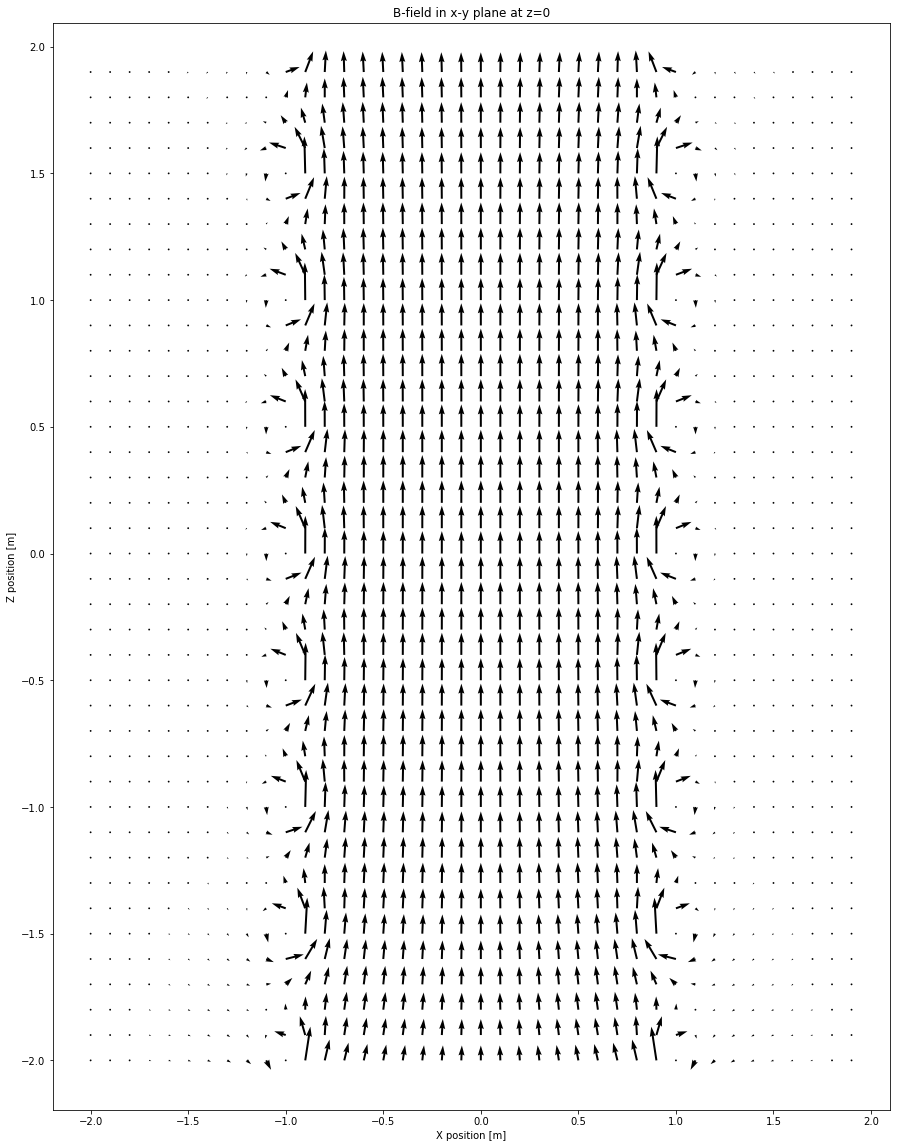

In [184]:
## define parameters
x_min = -2
x_max = 2
z_min = -2
z_max = 2
x_step = 0.1
z_step = 0.1
y_value = 0
R_loop = 0.98
x_pos = 0
y_pos = 0
z_pos = 0
I = 10
## whew that's a lot of parameters

m = 0
num_rings = 10
#ring_gap = 0.5
Bx = 0
By = 0
Bz = 0
z_pos = -2
while(m < num_rings): 
    Bx_temp,By_temp,Bz_temp = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)
    Bx += Bx_temp
    By += By_temp
    Bz += Bz_temp
    m += 1 
    z_pos += .5
    
'''
Bx1,By1,Bz1 = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)

x_pos = 0
y_pos = 0
z_pos = .2

Bx2,By2,Bz2 = B_xz_plane(x_min,x_max,z_min,z_max, 
                          x_step, z_step, y_value,R_loop,
                          x_pos,y_pos,z_pos,I)

Bx = Bx1 + Bx2
By = By1 + By2
Bz = Bz1 + Bz2
'''

B_mag = np.sqrt(Bx**2 + Bz**2) #np.sqrt(Bx**2 + Bz**2)

ok = np.ones((np.size(z_range),np.size(x_range)))
i = 0
while (i < np.size(x_range)):
    n = 0
    while (n < np.size(z_range)):
        if(B_mag[n,i] > np.max(B_mag)/2):
            ok[n,i] = 0
        n += 1
    i += 1

## strictly for plotting
x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)
X_mesh, Z_mesh = np.meshgrid(x_range, z_range)

plt.figure(figsize=(15,20))

qplot = plt.quiver(X_mesh, Z_mesh, ok*Bx, ok*Bz, units = 'width')
plt.title('B-field in x-y plane at z=0')
plt.ylabel('Z position [m]')
plt.xlabel('X position [m]')
plt.set_cmap('coolwarm')
plt.show()

<function matplotlib.pyplot.show>

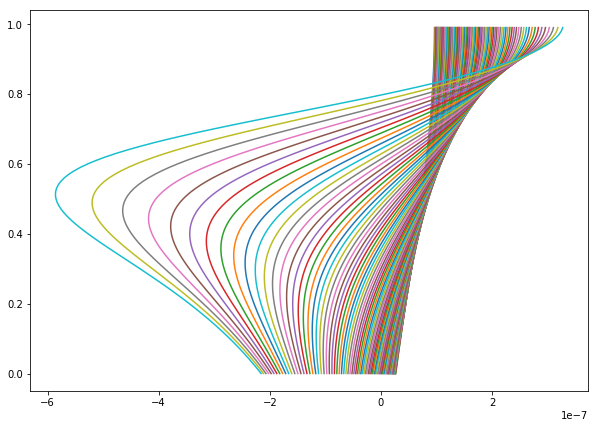

In [76]:
Bx,By,Bz = B_xz_plane(0,1,0,1,0,1,1,1,1,1)

x_min = 0
x_max = 1

z_min = 0
z_max = 1

x_step = 0.01
z_step = 0.01

x_range = np.arange(x_min, x_max, x_step)
z_range = np.arange(z_min, z_max, z_step)

plt.figure(figsize=(10,7))

it = 0
while (it < 90):
    plt.plot(Bz[it,:],x_range)
    it += 1

plt.show